## Y2: Computing: Finding the roots of a function using scipy.optimize.bisect
This notebook demonstrates how to use `scipy.optimize.bisect`, in this example to find the roots of the function $f(x)=\sqrt(x)-3cos(3x)$ in the interval (0, 2).  

In [1]:
# Relevant imports
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
%matplotlib inline

# Function definition (accepts a numpy array)
def f(x):
    return np.sqrt(x) - 3*np.cos(3*x)

The `bisect` method must be involked over an interval that contains exactly one root. The function $f(x)$ defined above is plotted below to help determine suitable intervals.

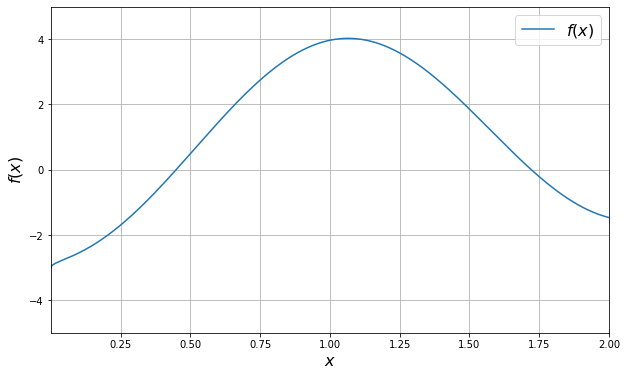

In [2]:
# array of 1000 samples
x = np.linspace(1e-08,2,1000) 

# Create new figure object to plot on (see final cell of notebook) 
fig = plt.figure(figsize=(10,6)) 
plt.xlabel(r'$x$', fontsize=16) 
plt.ylabel(r'$f(x)$', fontsize=16) 
# Surround a matplotlib text string with $ to render with mathtext 
# (r marks a raw string literal (special characters need not be escaped)
plt.axis([np.amin(x), np.amax(x), -5, 5]) 
plt.plot(x, f(x), label=r'$f(x)$') 
plt.legend(fontsize=16)
plt.grid(True)
plt.show() # Display the current figure 

There are clearly two roots of $f(x) = 0$ in the interval (0, 2), and suitable intervals on which to call the `.bisect` method are (0.2, 0.8) and (1.5, 2.0). 

Each call to the bisect method can return only one root, and when called with an interval (a,b)
the values for `f(a)` and `f(b)` **must** have different signs otherwise the call will fail.

In [3]:
# calling biset twice to find both roots.
first_root = optimize.bisect(f, 0.2, 0.8)
second_root = optimize.bisect(f, 1.5, 2.0)
print(("The first root of f(x) in the interval (0,2) is x = {:.5f},\n" +
      "and the second root is x = {:.5}.").format(first_root, second_root))

The first root of f(x) in the interval (0,2) is x = 0.44855,
and the second root is x = 1.7217.


**Cross Check**

It's important to cross-check our results, to test whether we compute wrong results due to a simple mistake, such as a typo. We can for example do that by plotting the results together with the previous graph:

In [ ]:
x = np.linspace(1e-08,2,1000) 
fig = plt.figure(figsize=(10,6)) 
plt.title('Plotting the zeros of a function', fontsize=20) 
plt.xlabel(r'$x$', fontsize=16) 
plt.ylabel(r'$f(x)$', fontsize=16) 
plt.axis([np.amin(x), np.amax(x), -5, 5]) 
plt.plot(x, f(x), label=r'$f(x)$') 
plt.legend(fontsize=16)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=first_root, color='k', linestyle='--')
plt.axvline(x=second_root, color='k', linestyle='--')

plt.show() 

### Aside: figure objects in `matplotlib.pyplot`
A call to `plt.plot` automatically creates a new figure and axes objects on which to plot, provided that one does not already exist. However, a new figure object can also be explicitly created using `plt.figure` as above, giving a handle on the figure object and hence a greater degree of control (above we specify its frame size in inches: 10x6). The current figure object may also be retrieved using `plt.gcf()`. Subsequent calls to pyplot functions (`plt.plot`, `plt.xlabel`, etc.) will default to adding or modifying this figure object.

More information on figure and axis objects may be found in the `matplotlib` [documentation.](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)